<a href="https://colab.research.google.com/github/HopeRetina/denoising/blob/main/Denoising_biomedical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.signal import detrend
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving EKG_signals.csv to EKG_signals.csv


In [7]:
df = pd.read_csv('EKG_signals.csv',sep = ',', names = ['noisy', 'orig'])

In [8]:
df

,noisy,orig
0,920.23,963
1,929.06,987
2,1116.60,1024
3,1073.60,1073
4,1070.60,1134
...,...,...
995,953.24,1020
996,913.34,1020
997,961.08,1025
998,953.80,1030


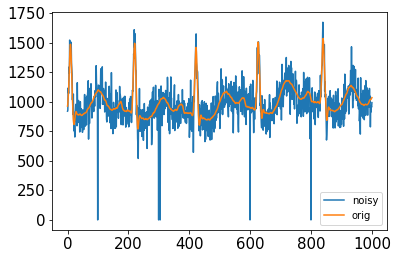

In [10]:
df.plot(fontsize=15)
plt.show()

In [11]:
# when there are positive and negative in the noise, then mean or Gaussian filters are good approach
df['filtered'] = df['noisy'].copy()
df.head()

,noisy,orig,filtered
0,920.23,963,920.23
1,929.06,987,929.06
2,1116.60,1024,1116.60
3,1073.60,1073,1073.60
4,1070.60,1134,1070.60


In [15]:
# median filter for small values

threshold = 321
# find the subthreshold data indices

subthreshidx = np.where(df['filtered']<threshold)[0]

# apply the medin filter
k = 7
for i in subthreshidx:
  df['filtered'][i] = np.median(df['filtered'][np.max((0, i-k)): np.min((len(df), i+k))])

<ipython-input-15-55e6a4fca3a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered'][i] = np.median(df['filtered'][np.max((0, i-k)): np.min((len(df), i+k))])


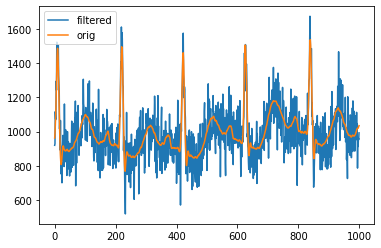

In [17]:
df[['filtered', 'orig']].plot()

In [18]:
# apply the medin filter
k = 7
for i in range(len(df)):
  df['filtered'][i] = np.mean(df['filtered'][np.max((0, i-k)): np.min((len(df), i+k))])

<ipython-input-18-736ce38966af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered'][i] = np.mean(df['filtered'][np.max((0, i-k)): np.min((len(df), i+k))])


(400.0, 450.0)

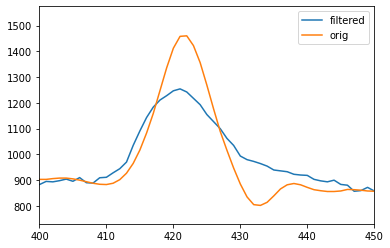

In [20]:
df[['filtered', 'orig']].plot()

# zoom in
plt.xlim([400, 450])

(-42.04459468856825, 12.04989818952487)


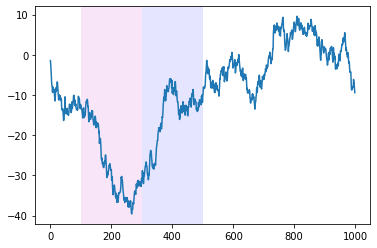

In [27]:
#  Creating a brownian time series

x = np.cumsum(np.random.randn(1000))

fig, ax = plt.subplots(1)
ax.plot(x)

ylim = ax.get_ylim()
print(ylim)
ax.fill_between([100, 300], ylim[0], ylim[1], facecolor='m', alpha=0.1)
ax.fill_between([301, 500], ylim[0], ylim[1], facecolor='b', alpha=0.1)
ax.set_ylim(ylim)
plt.show()


(-31.934686411623236, 31.84003272659548)


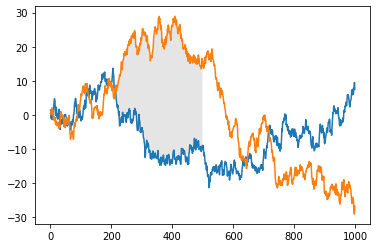

In [29]:
#  Creating a brownian time series

x1 = np.cumsum(np.random.randn(1000))
x2 = np.cumsum(np.random.randn(1000))

fig, ax = plt.subplots(1)
ax.plot(x1)
ax.plot(x2)

xlim = np.arange(200, 500)
ylim = ax.get_ylim()
print(ylim)
ax.fill_between(xlim, x1[xlim], x2[xlim], facecolor='k', alpha=0.1)
ax.set_ylim(ylim)
plt.show()
